# Feature Set: All variables

In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

df = pd.read_csv("./kwh.csv")
df.date = pd.to_datetime(df.date)
df['day'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.weekofyear
df['hour'] = df['date'].dt.hour
df['key'] = df['device_id']
devices = pd.read_csv("./device.csv")
devices['key'] = df['id']
df = pd.merge(left = df, right = devices, on = ['key'])
df['is_active'] = df['is_active'].apply(lambda x : 1 if x else 0)
df['device_id'] = df['device_id_x']
del df['date'], df['device_id_x'], df['device_id_y'], df['id_x'], df['id_y'], df['key'], df['device_unique_name']

df

,metric,day,month,week,hour,project,system_name,distributer_name,is_active,country,tag_site_type,tag_size,sqm,latitude,longitude,device_id
0,16,91,4,13,0,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1
1,16,91,4,13,1,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1
2,16,91,4,13,2,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1
3,15,91,4,13,3,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1
4,16,91,4,13,4,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1
5,16,91,4,13,5,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1
6,20,91,4,13,6,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1
7,29,91,4,13,7,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1
8,22,91,4,13,8,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1
9,30,91,4,13,9,PowerSines srl,Gruppo Cremonini Spa,Roadhouse Grill Italia S.r.l,1,Italy,Restaurant,Medium,2500,45.410174,11.907606,1


Variable dependence. 

In [ ]:
numerical_features = ['metric', 'day', 'month', 'week', 'hour', 'is_active', 'sqm', 'latitude', 'longitude', 'device_id']
deldf = df[numerical_features]
sns.heatmap(deldf, annot=True)

Let's start with regular and polynomial regression first. 

['day', 'month', 'week', 'hour', 'is_active', 'sqm', 'latitude', 'longitude'] (164878, 13)
4 KFold(n_splits=4, random_state=None, shuffle=False)
(164878, 9) (164878,) (123658, 9) (41220, 9) (123658,) (41220,)


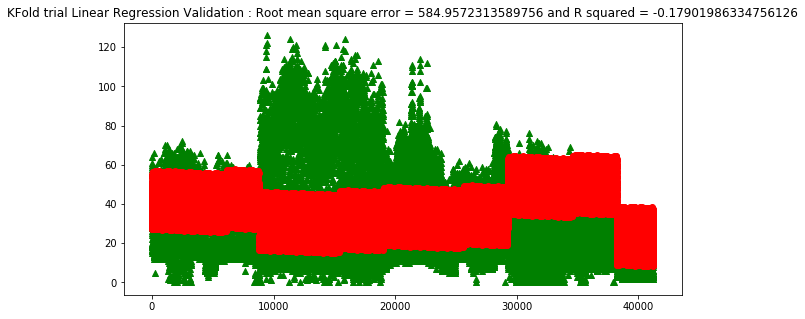

(164878, 9) (164878,) (123658, 9) (41220, 9) (123658,) (41220,)


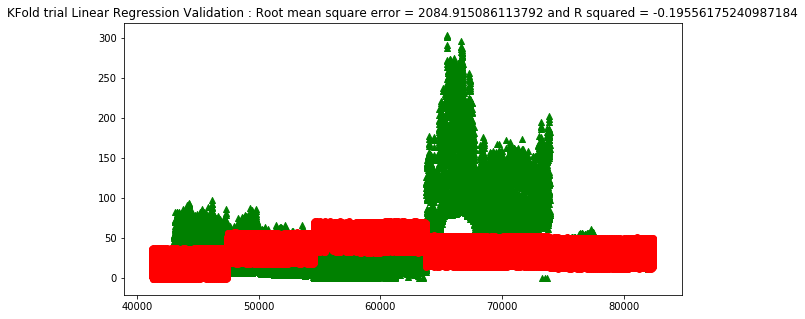

(164878, 9) (164878,) (123659, 9) (41219, 9) (123659,) (41219,)


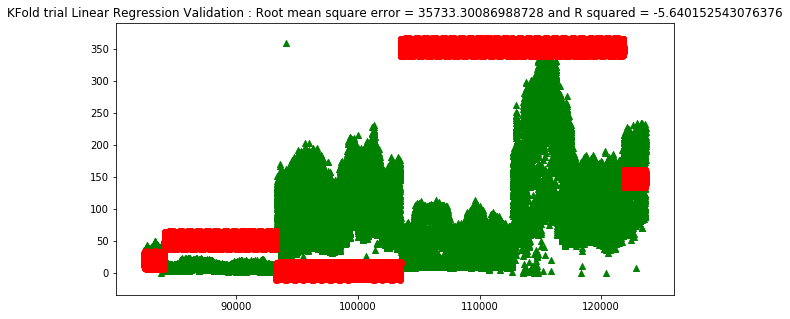

(164878, 9) (164878,) (123659, 9) (41219, 9) (123659,) (41219,)


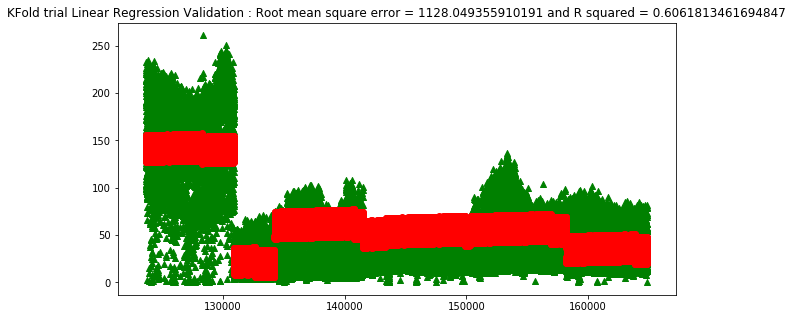

4 KFold(n_splits=4, random_state=None, shuffle=False)
(164878, 45) (164878,) (123658, 45) (41220, 45) (123658,) (41220,)


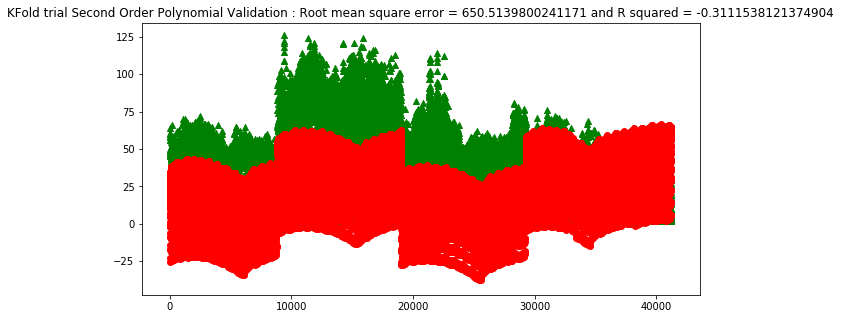

(164878, 45) (164878,) (123658, 45) (41220, 45) (123658,) (41220,)


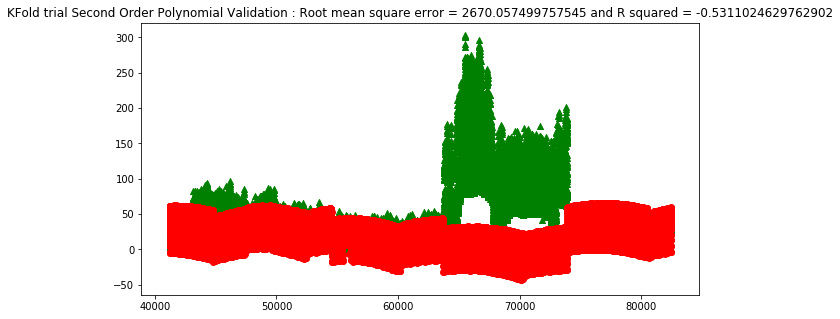

(164878, 45) (164878,) (123659, 45) (41219, 45) (123659,) (41219,)


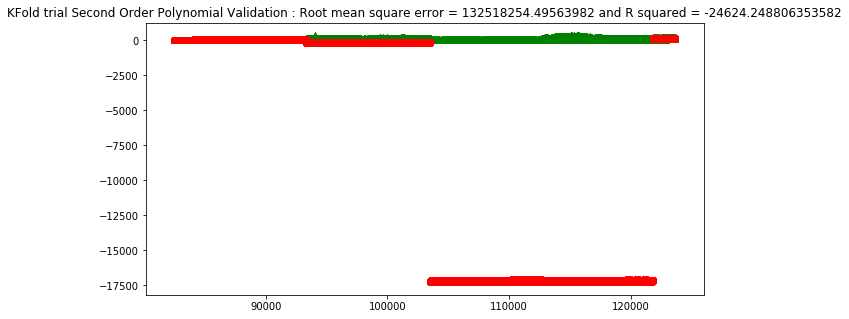

(164878, 45) (164878,) (123659, 45) (41219, 45) (123659,) (41219,)


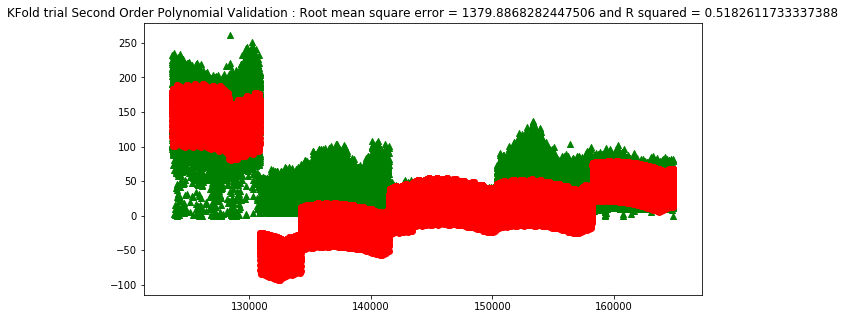

4 KFold(n_splits=4, random_state=None, shuffle=False)
(164878, 165) (164878,) (123658, 165) (41220, 165) (123658,) (41220,)


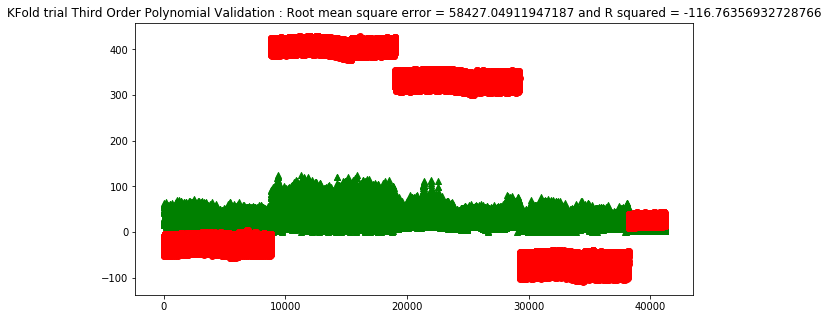

(164878, 165) (164878,) (123658, 165) (41220, 165) (123658,) (41220,)


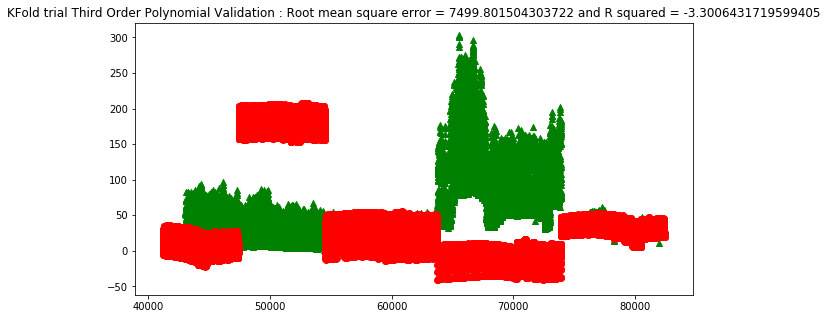

(164878, 165) (164878,) (123659, 165) (41219, 165) (123659,) (41219,)


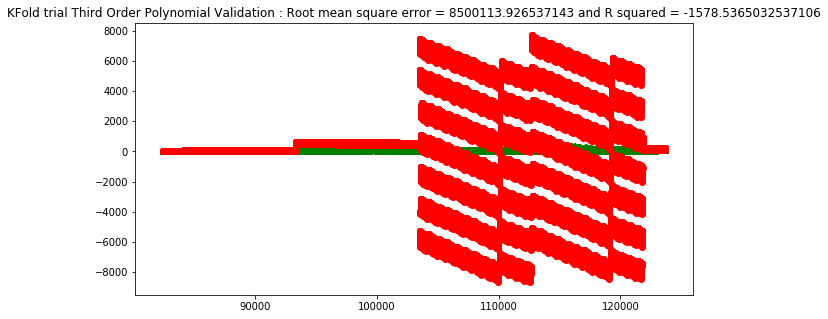

(164878, 165) (164878,) (123659, 165) (41219, 165) (123659,) (41219,)


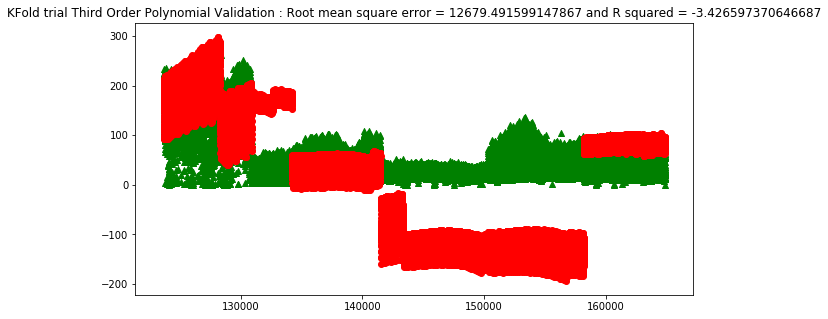

4 KFold(n_splits=4, random_state=None, shuffle=False)
(164878, 495) (164878,) (123658, 495) (41220, 495) (123658,) (41220,)


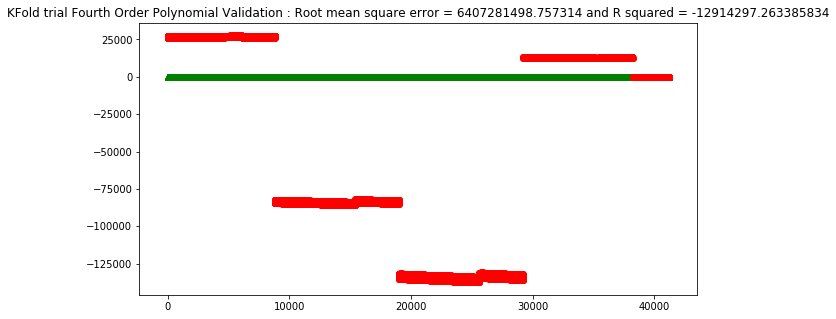

(164878, 495) (164878,) (123658, 495) (41220, 495) (123658,) (41220,)


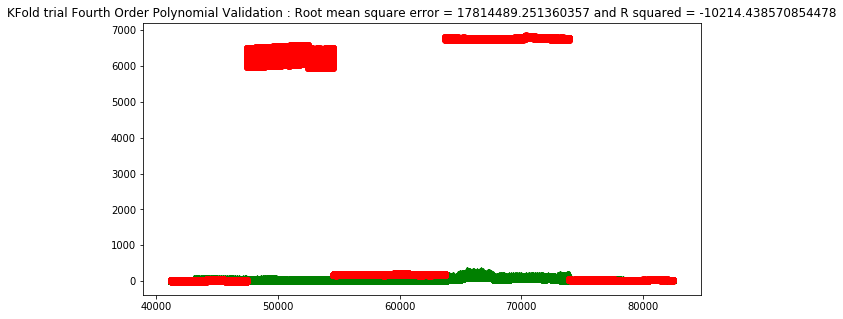

(164878, 495) (164878,) (123659, 495) (41219, 495) (123659,) (41219,)


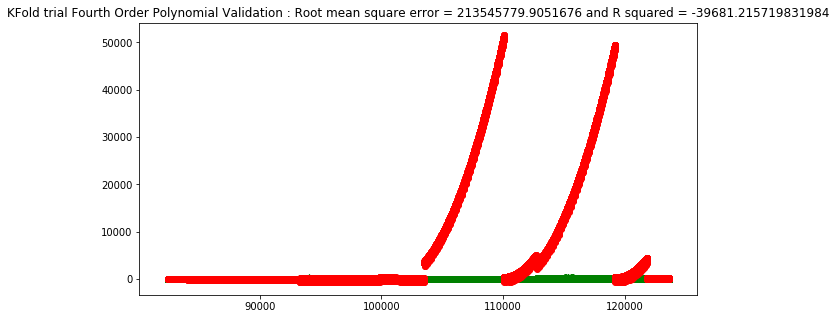

(164878, 495) (164878,) (123659, 495) (41219, 495) (123659,) (41219,)


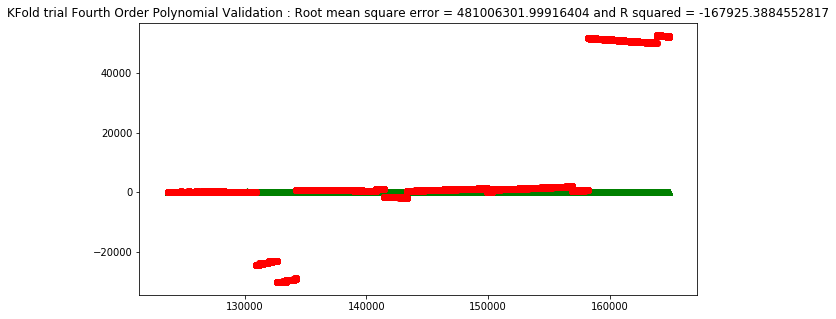

In [2]:
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

features = [x for x in df.columns if x not in ['metric', 'country', 'tag_size', 'tag_site_type', 'device_id']]

def polyfit(df, fcount, title):
    train = df[features]
    y = df['metric']
    pf = PolynomialFeatures(fcount)
    X = pf.fit_transform(train)
    kf = KFold(n_splits = 4)
    print(kf.get_n_splits(X), kf)

    scored  = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

        model = linear_model.LinearRegression()
        model.fit(X_train, y_train)
        y_predicted = model.predict(X_test)
        
        rsquared = model.score(X_test, y_test)
        rmse = mean_squared_error(y_test.values, y_predicted)
        scored.append((model, y_predicted, rsquared, rmse))
        
        fig = plt.figure(figsize = (10, 5))
        plt.title("KFold trial {} : Root mean square error = {} and R squared = {}".format(title, rmse, rsquared))
        deldf = pd.DataFrame()
        deldf['Actual'] = y_test
        deldf['Predicted'] = y_predicted
        plt.scatter(deldf.index, deldf['Actual'], c = "g", marker = "^")
        plt.scatter(deldf.index, deldf["Predicted"], c  = "r", marker = "o")
        plt.show()
    
    rmses = [x[-1] for x in scored]
    idx = rmses.index(min(rmses))
    return scored[idx]

print(features, df.shape)
op_linear = polyfit(df, 1, "Linear Regression Validation")
op2 = polyfit(df, 2, "Second Order Polynomial Validation")
op3 = polyfit(df, 3, "Third Order Polynomial Validation")
op4 = polyfit(df, 4, "Fourth Order Polynomial Validation")

In [3]:
op_linear

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 array([27.23991765, 28.47007859, 29.70023953, ...,  9.80154281,
        11.03170375, 12.26186469]),
 -0.17901986334756126,
 584.9572313589756)